In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

# 데이터 선정

In [6]:
df = pd.read_csv('한국도로교통공단_시도 시군구별 교통사고 통계_20241231.csv',encoding='cp949')
df.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,917,5,230,938,85
1,서울,중구,976,16,241,876,119
2,서울,용산구,868,12,224,917,33
3,서울,성동구,919,7,210,889,56
4,서울,동대문구,1520,5,403,1369,134


* 공공데이터 포털에서 csv 파일 검색

# 데이터 읽기

# 데이터 기본 분석

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      229 non-null    object
 1   시군구     229 non-null    object
 2   사고건수    229 non-null    int64 
 3   사망자수    229 non-null    int64 
 4   중상자수    229 non-null    int64 
 5   경상자수    229 non-null    int64 
 6   부상신고자수  229 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.7+ KB


# 데이터 전처리

* 결측치
* 이상치
* 중복데이터

In [10]:
df[df.duplicated(keep=False)] #

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수


In [11]:
def find_outliers(df, threshold=3):
    numeric_df = df.select_dtypes(include=[np.number])
    z_scores = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
    outliers = (z_scores > threshold).any(axis=1)
    return df[outliers]

In [12]:
outliers_df = find_outliers(df)
outliers_df

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
15,서울,강남구,3754,11,716,3773,374
41,경기,수원시,4720,24,1069,5099,476
42,경기,성남시,3487,23,793,3829,451
46,경기,안산시,3513,21,756,3895,475
47,경기,평택시,3084,31,709,3378,573
52,경기,화성시,3711,38,828,4146,613
55,경기,고양시,3489,31,891,3711,385
62,경기,용인시,3466,31,773,4114,520
72,강원,춘천시,1394,18,373,1231,540
90,충북,청주시,4162,45,979,4952,225


# 분석용 데이터 변환

* value_counts()
* 사용자 정의 전처리: apply()

In [113]:
df.value_counts()

시도  시군구  사고건수  사망자수  중상자수  경상자수  부상신고자수
강원  강릉시  666   13    203   771   11        1
    고성군  96    5     27    126   5         1
    동해시  266   4     89    261   15        1
    삼척시  201   6     80    232   0         1
    속초시  338   5     156   356   2         1
                                          ..
충북  제천시  807   11    205   942   114       1
    증평군  156   5     43    162   5         1
    진천군  525   15    140   563   9         1
    청주시  4162  45    979   4952  225       1
    충주시  1105  15    289   1360  18        1
Name: count, Length: 229, dtype: int64

In [ ]:
df

In [121]:
df_group['사망률'] = df_group['사망자수'] / df_group['사고건수'] * 100
df_group['사망률'] 

시도
강원    2.040472
경기    0.904648
경남    2.176960
경북    2.537730
광주    0.593515
대구    0.870671
대전    0.547397
부산    0.906264
서울    0.633498
세종    0.568643
울산    1.454139
인천    1.075535
전남    2.447340
전북    2.978942
제주    1.211204
충남    2.619155
충북    1.802478
Name: 사망률, dtype: float64

In [142]:
sum = 0
for i in range(len(df_group)) :
    sum += df_group.사고건수.values[i]
    print(sum)

5930
58105
68808
79211
86119
96341
103831
115086
148551
149782
153358
161447
169660
175501
179464
188360
196349


In [132]:
avg = sum/len(df_group)
avg

np.float64(11549.941176470587)

In [65]:
df_group = df.groupby('시도').agg({
    '사고건수':'sum',
    '사망자수':'sum',
    '중상자수':'sum',
    '경상자수':'sum',
    '부상신고자수':'sum'
})
df_group

,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도,,,,,
강원,5930,121,1900,6438,908
경기,52175,472,12235,57460,6712
경남,10703,233,4254,9309,994
경북,10403,264,3732,10200,869
광주,6908,41,1105,8686,492
대구,10222,89,2537,10517,1175
대전,7490,41,1556,8790,342
부산,11255,102,3418,10759,995
서울,33465,212,7575,33387,3365


In [151]:
df_group = df.groupby('시도').sum()
df_group.drop('시군구',axis=1,inplace=True)
df_group

,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도,,,,,
강원,5930,121,1900,6438,908
경기,52175,472,12235,57460,6712
경남,10703,233,4254,9309,994
경북,10403,264,3732,10200,869
광주,6908,41,1105,8686,492
대구,10222,89,2537,10517,1175
대전,7490,41,1556,8790,342
부산,11255,102,3418,10759,995
서울,33465,212,7575,33387,3365


In [66]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고건수    17 non-null     int64
 1   사망자수    17 non-null     int64
 2   중상자수    17 non-null     int64
 3   경상자수    17 non-null     int64
 4   부상신고자수  17 non-null     int64
dtypes: int64(5)
memory usage: 816.0+ bytes


In [146]:
df_sorted = df_group.sort_values(by='사고건수', ascending=False)

# 결과 확인
print(df_sorted)

     사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률
시도                                             
경기  52175   472  12235  57460    6712  0.904648
서울  33465   212   7575  33387    3365  0.633498
부산  11255   102   3418  10759     995  0.906264
경남  10703   233   4254   9309     994  2.176960
경북  10403   264   3732  10200     869  2.537730
대구  10222    89   2537  10517    1175  0.870671
충남   8896   233   2857   9233     716  2.619155
전남   8213   201   2257   9624     525  2.447340
인천   8089    87   1720   8536     512  1.075535
충북   7989   144   2198   9200     450  1.802478
대전   7490    41   1556   8790     342  0.547397
광주   6908    41   1105   8686     492  0.593515
강원   5930   121   1900   6438     908  2.040472
전북   5841   174   1784   6426     277  2.978942
제주   3963    48   1048   4062     634  1.211204
울산   3576    52   1144   3325     435  1.454139
세종   1231     7    233   1319     257  0.568643


# 시각화

* Bar차트

In [104]:
df_group.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')

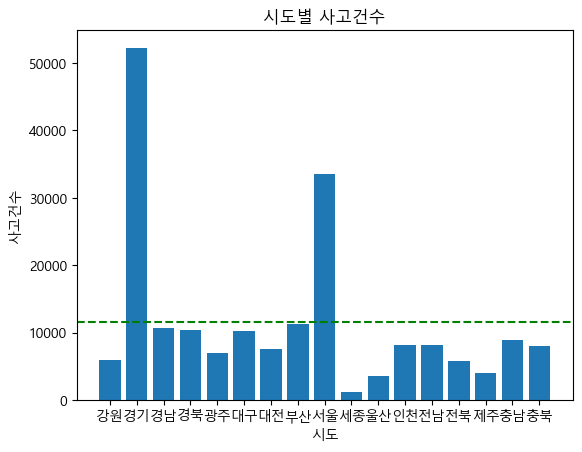

In [140]:
list = df_group.index.tolist()
x = np.arange(len(list))
values = df_group.사고건수.value_counts().index.tolist()
plt.bar(x, values)
plt.xticks(x, list)

plt.xlabel('시도')
plt.ylabel('사고건수')
plt.title('시도별 사고건수')
plt.axhline(y = avg, color = 'g', linestyle = '--', label='평균치')
plt.show()

In [143]:
sorted_index = df_group['사고건수'].value_counts().sort_values(ascending=False).index.tolist()

print(sorted_index)

[5930, 52175, 10703, 10403, 6908, 10222, 7490, 11255, 33465, 1231, 3576, 8089, 8213, 5841, 3963, 8896, 7989]


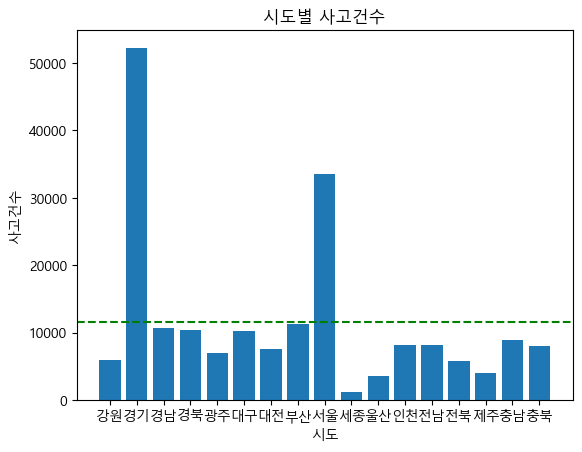

In [140]:
list = df_group.index.tolist()
x = np.arange(len(list))
values = df_group.사고건수.value_counts().index.tolist()
plt.bar(x, values)
plt.xticks(x, list)

plt.xlabel('시도')
plt.ylabel('사고건수')
plt.title('시도별 사고건수')
plt.axhline(y = avg, color = 'g', linestyle = '--', label='평균치')
plt.show()

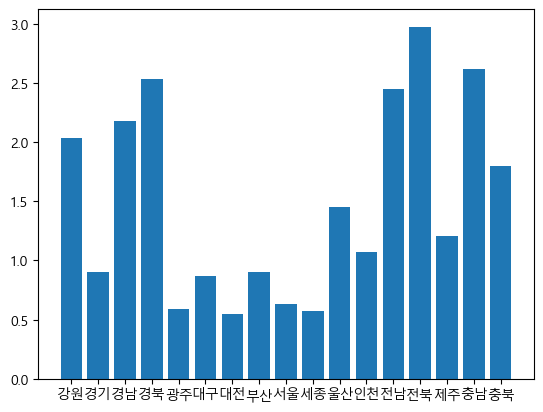

In [120]:
list = df_group.index.tolist()
x = np.arange(len(list))
values = df_group.사망률.value_counts().index.tolist()
plt.bar(x, values)
plt.xticks(x, list)
plt.show()

* 파이 차트

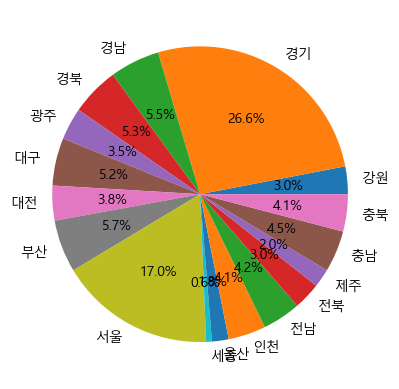

In [112]:
plt.pie(values, labels=list, autopct='%.1f%%')
# autopct: % 포맷 문자열의 시작을 명시, .1f: 소스점 첫째자리까지 표기, %%: %기호를 표기
plt.show()